## Data Sourcing

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# reading data files
# using encoding = "UTF-8" to avoid pandas encoding error
loan = pd.read_csv("loan.csv", encoding='UTF-8')

C:\Users\avszo\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Look at loan head
print(loan.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                NaN              

### Insight : Many Variables contain some missing values, as shown above. We'll deal with them after we're done with understanding the data - column names, primary keys of tables etc.

In [3]:
# inspect the structure etc.
print(loan.info(), "\n")
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


In [4]:
#number of unique id's
len(loan.id.unique())

39717

## Data Cleaning and Manipulation

In [5]:
# inspect the no. of null values in each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


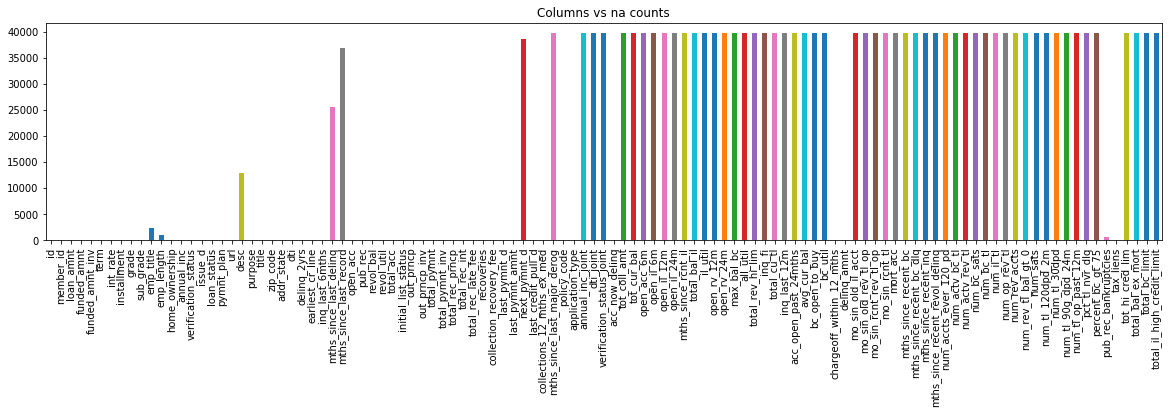

In [6]:
na_cols = loan.isnull().sum()
plt.figure(figsize = (20, 4))
na_cols.plot(kind = 'bar')
plt.title('Columns vs na counts')
plt.show()

### Insight : There are lot of tables with all null values. So let's remove them first.

In [8]:
na_cols = loan.isnull().sum()
na_cols = na_cols[na_cols.values == len(loan)]

# Get all the column names with all null values and drop them
na_colnames = list(na_cols.index)
loan.drop(labels = na_colnames, axis = 1, inplace=True)
loan.shape

(39717, 57)

### This removed almost half of the columns. Now let's plot the remaining columns against no. of 'na' values in them on a graph 

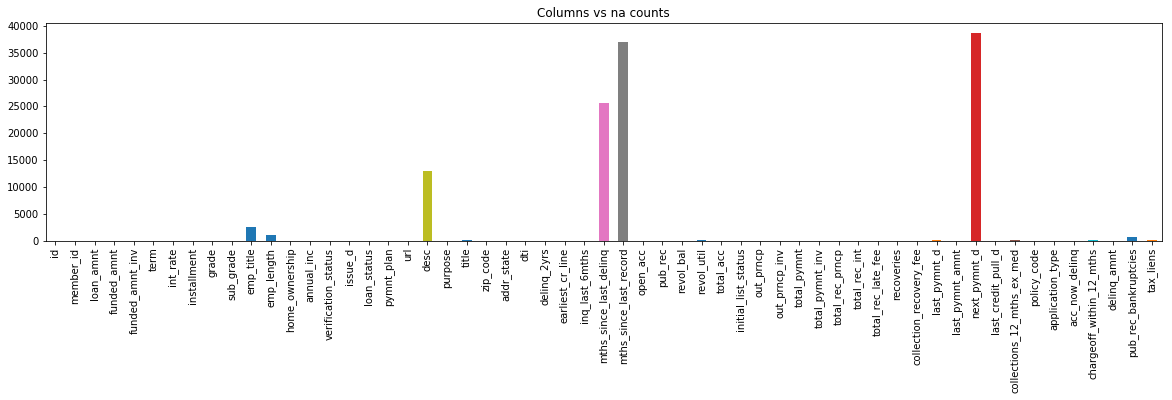

In [9]:
na_cols = loan.isnull().sum()
plt.figure(figsize = (20, 4))
na_cols.plot(kind = 'bar')
plt.title('Columns vs na counts')
plt.show()

### Since 'next_payment_d' doesn't make much sense to our analysis and has a large no. of 'na' values, we can drop that column

In [10]:
# Drop 'next_pymnt_d' column
loan.drop(['next_pymnt_d'], axis = 1, inplace = True)

### Let's look at no of unique values in each column and will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [11]:
# Find columns with only one unique value
unique_val = loan.nunique()
unique_val = unique_val[unique_val.values == 1]
print(unique_val)

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


In [12]:
# Drop columns with only 1 unique value.
loan.drop(labels = list(unique_val.index), axis = 1, inplace = True)
print("So now we are left with", loan.shape, "rows & columns.")

So now we are left with (39717, 47) rows & columns.


### Remove irrelevant columns:
### Till now we have removed columns based on their count & statistics. Now let's look at each column from a business perspective to see if they are required for our analysis and we will remove those which are not required.

In [13]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


### So columns like id, member_id, emp_title, title, url, desc. As last 2 digits of zip_code is masked 'xx', we can remove that as well.

In [14]:
not_required_columns = ["id", "member_id", "emp_title", "title", "url", "zip_code","desc"]

# Drop these columns
loan.drop(labels = not_required_columns, axis = 1, inplace = True)
print("So now we are left with", loan.shape, "rows & columns.")

So now we are left with (39717, 40) rows & columns.


In [15]:
loan["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [16]:
# We will remove the outlier rows with high income 
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

In [17]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

### Employment Term : 
### There are some values in emp_length which are 'n/a'. We assume they are 'self-employed', because for 'self-employed' applicants, emp-lenth is 'Not Applicable'
### Let's replace those 'n/a' values with 'self-employed'.

In [18]:
loan.emp_length.fillna('Self-Employed', inplace=True)
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years',
       'Self-Employed'], dtype=object)

In [19]:
# Removing % symbol from int_rate as we need to convert int_rate to float from string
loan['int_rate'] = loan['int_rate'].str.replace("%","")

### Cast all continuous variables to numeric so that we can find a correlation between them

In [20]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti', 'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [21]:
loan.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN
39716,7500,7500,800.0,36 months,13.75,255.43,E,E2,< 1 year,OWN,...,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10,NaN


In [22]:
# removing rows with missing revol_util values
loan = loan[~pd.isnull(loan['revol_util'])]

In [23]:
# removing rows with missing last_pymnt_d values
loan = loan[~pd.isnull(loan['last_pymnt_d'])]

In [24]:
# removing rows with missing pub_rec_bankruptcies values
loan = loan[~pd.isnull(loan['pub_rec_bankruptcies'])]  

In [25]:
# removing rows with missing last_credit_pull_d values
loan = loan[~pd.isnull(loan['last_credit_pull_d'])] 

In [26]:
loan.loan_status.value_counts()

Fully Paid     32149
Charged Off     5402
Current         1135
Name: loan_status, dtype: int64

In [28]:
# removing rows with loan status as 'current'
loan = loan[loan['loan_status'] != 'Current']

In [29]:
# inspect the structure etc.
print(loan.info(), "\n")
print("So now we are left with",loan.shape ,"rows & columns.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37551 entries, 0 to 39680
Data columns (total 40 columns):
loan_amnt                  37551 non-null int64
funded_amnt                37551 non-null int64
funded_amnt_inv            37551 non-null float64
term                       37551 non-null object
int_rate                   37551 non-null float64
installment                37551 non-null float64
grade                      37551 non-null object
sub_grade                  37551 non-null object
emp_length                 37551 non-null object
home_ownership             37551 non-null object
annual_inc                 37551 non-null float64
verification_status        37551 non-null object
issue_d                    37551 non-null object
loan_status                37551 non-null object
purpose                    37551 non-null object
addr_state                 37551 non-null object
dti                        37551 non-null float64
delinq_2yrs                37551 non-null int64
earlies

In [30]:
loan.mths_since_last_delinq.value_counts().head(5)

30.0    239
23.0    233
15.0    233
24.0    230
38.0    229
Name: mths_since_last_delinq, dtype: int64

In [31]:
loan.mths_since_last_record.value_counts().head(5)

104.0    60
89.0     57
113.0    57
111.0    55
108.0    54
Name: mths_since_last_record, dtype: int64

In [42]:
loan.pub_rec_bankruptcies.value_counts().head(5)    

0.0    35920
1.0     1626
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

### Though there are missing ('NA') values within 'mths_since_last_delinq', 'mths_since_last_record' and 'pub_rec_bankruptcies' columns, they also have value '0' for many rows. So it is better to keep these 'NA' columns as it for our analysis instead of imputing them with '0'.

### It is also better to keep the 'NA' values as it is for the date columns like 'last_pymnt_d', 'last_credit_pull_d', etc

### Now that we have a reasonably clean dataset, let's create some more columns from the existing columns to aid our analysis

In [41]:
loan['loan_amnt'].describe()

count    37551.00000
mean     11036.77665
std       7319.73055
min        500.00000
25%       5375.00000
50%       9600.00000
75%      15000.00000
max      35000.00000
Name: loan_amnt, dtype: float64

In [40]:
# Create a new column 'loan_amnt_range' to have 'loan_amnt' as ranges
bins = [0, 5000, 10000, 15000, 20000, 25000, 40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [39]:
loan['annual_inc'].describe().apply(lambda x : format(x, 'f'))

count     37551.000000
mean      66278.104363
std       37285.885191
min        4000.000000
25%       40000.000000
50%       58500.000000
75%       81555.000000
max      294000.000000
Name: annual_inc, dtype: object

In [37]:
# Create a new column 'annual_inc_range' to have 'annual_inc' as ranges
bins = [0, 25000, 50000, 75000, 100000, 1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000','100000 - above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [38]:
loan['int_rate'].describe()

count    37551.000000
mean        11.938319
std          3.704382
min          5.420000
25%          8.940000
50%         11.830000
75%         14.440000
max         24.400000
Name: int_rate, dtype: float64

In [36]:
# Create a new column 'int_rate_range' to have 'int_rate' as ranges
bins = [0, 7.5, 10, 12.5, 15, 20 , 25]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 - 20', '20 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

In [35]:
# Create a new column 'charged_off_state' and fill 1 for charged off customers and 0 for others
loan['charged_off_state'] = loan['loan_status'].apply(lambda x : x == 'Charged Off')

In [34]:
# Loan amount to Annual Income ratio
loan['loan_income_ratio'] = loan['loan_amnt'] / loan['annual_inc']

## Data Analysis

### 1. Univariate analysis - Lets divide our univariate analysis into two categories - analysis of categorical variables and analysis of quantitative variables

### a. Analysis of categorical variables

### We will evaluate 'grade', 'emp_length', 'home_ownership', 'verification_status', 'term', 'addr_state', 'annual_inc_range', 'int_rate_range' one by one and will see which of these features provide an insight into higher default ratio

### grade (ordered Categorical)

B    11399
A     9864
C     7565
D     4917
E     2578
F      944
G      284
Name: grade, dtype: int64


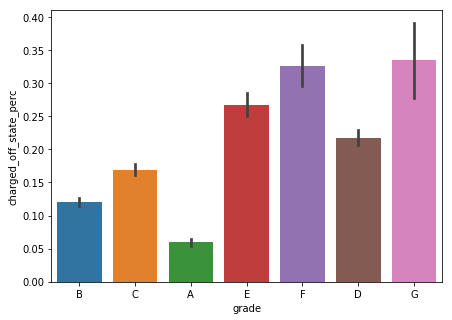

In [43]:
# grade
# let see grade frequency plot, grade is an ordered categorical variable ranging from A to G where A type of loans are 
# treated as better quality loan

print(loan.grade.value_counts())
plt.figure(figsize=(7,5))
sns.barplot(x='grade', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : Its pretty evident that lower the grade of loan, higher the default chances. But how we assign these grades.

### emp_length

10+ years        8281
< 1 year         4308
2 years          4178
3 years          3918
4 years          3272
5 years          3131
1 year           3044
6 years          2124
7 years          1678
8 years          1395
9 years          1200
Self-Employed    1022
Name: emp_length, dtype: int64


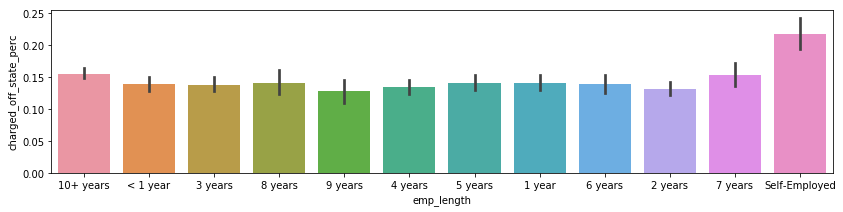

In [44]:
# let see emp_length frequency plot

print(loan.emp_length.value_counts())
plt.figure(figsize=(14,3))
sns.barplot(x='emp_length', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : Its pretty evident that self-employed people have higher chance of dafaulting. But we may need to do more analysis to confirm this.

### home_ownership

RENT        17970
MORTGAGE    16601
OWN          2885
OTHER          95
Name: home_ownership, dtype: int64


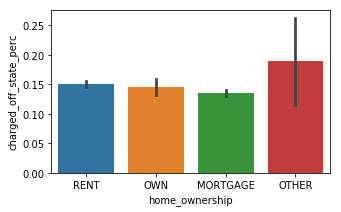

In [45]:
# let see home_ownership frequency plot
print(loan.home_ownership.value_counts())
plt.figure(figsize=(5,3))
sns.barplot(x='home_ownership', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### 'Others' have high default ratio but its marginal so cannot be treated as a huge influencer in end result.

### verification_status

Not Verified       15879
Verified           12091
Source Verified     9581
Name: verification_status, dtype: int64


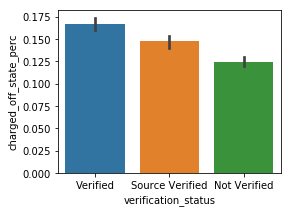

In [46]:
# let see verification_status frequency plot
print(loan.verification_status.value_counts())
plt.figure(figsize=(4,3))
sns.barplot(x='verification_status', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### Not any particular pattern again.

### Term of Loan

 36 months    28152
 60 months     9399
Name: term, dtype: int64


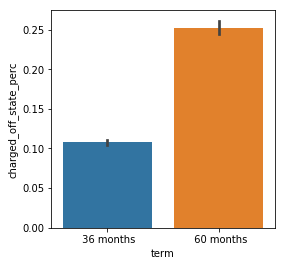

In [47]:
# let see term frequency plot
print(loan.term.value_counts())
plt.figure(figsize=(4,4))
sns.barplot(x='term', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : Its pretty obvious that long term loans are more suspectible to default than shorter term loan.

### addr_state

CA    6808
NY    3579
FL    2708
TX    2584
NJ    1734
IL    1450
PA    1449
VA    1325
GA    1324
MA    1248
OH    1152
MD     984
AZ     828
WA     792
CO     736
NC     713
CT     707
MI     689
MO     655
MN     595
NV     472
SC     449
OR     428
AL     424
WI     420
LA     412
KY     308
OK     286
KS     252
UT     245
AR     231
DC     206
RI     190
NM     175
WV     171
HI     164
NH     163
DE     110
MT      83
WY      79
AK      76
SD      60
VT      51
MS      19
TN      10
ID       4
NE       1
IA       1
IN       1
Name: addr_state, dtype: int64


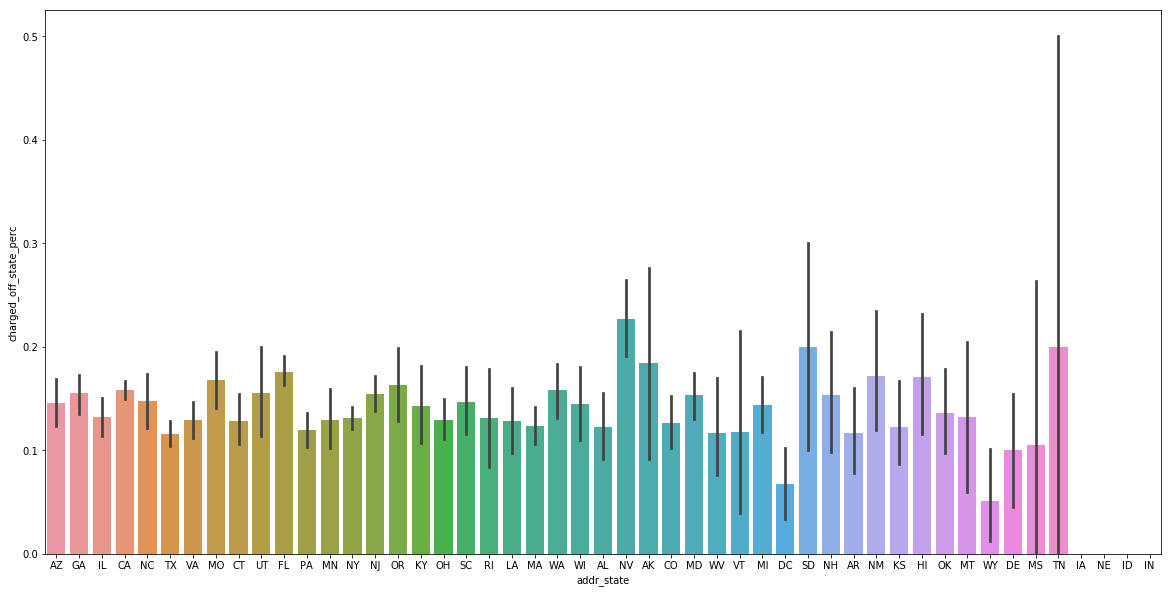

In [48]:
# let see addr_state frequency plot
print(loan.addr_state.value_counts())
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : State NV has a high default rate compared to other states. But states like FL, CA also has more no. of customers and a significant percentage of defaulters. So these applicants from these states hass to be dealt carefully

### annual_inc_range

25000-50000       12553
50000-75000       11458
75000-100000       5935
100000 - above     5168
0-25000            2437
Name: annual_inc_range, dtype: int64


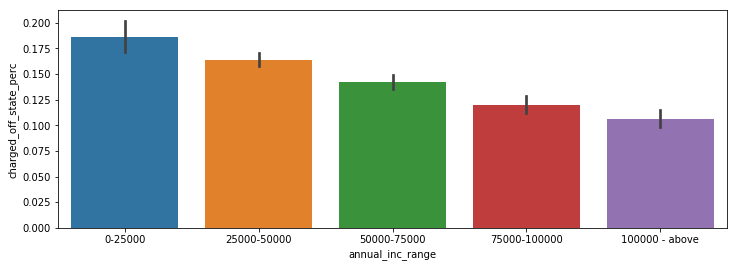

In [49]:
# let see annual_inc_range frequency plot
print(loan.annual_inc_range.value_counts())
plt.figure(figsize=(12,4))
sns.barplot(x='annual_inc_range', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

###  Insigth : There is an increasing chance of default with a decreasing annual income. But we may need to compare this with some other variables to conclude anything.

### int_rate_range

10-12.5         9040
12.5-15         8679
15 - 20         7106
7.5-10          6662
0-7.5           5317
20 and above     747
Name: int_rate_range, dtype: int64


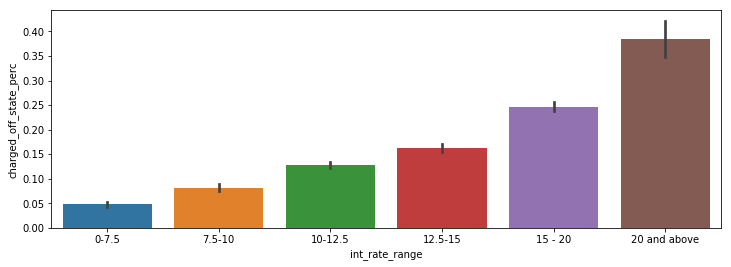

In [50]:
# let see int_rate_range frequency plot
print(loan.int_rate_range.value_counts())
plt.figure(figsize=(12,4))
sns.barplot(x='int_rate_range', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : There is a definite pattern of higher interest rate results in higher default rates. But we may need to find more insights by doing a bivariate analysis with this.

### purpose

debt_consolidation    17645
credit_card            4904
other                  3724
home_improvement       2769
major_purchase         2110
small_business         1680
car                    1478
wedding                 894
medical                 666
moving                  560
vacation                368
house                   354
educational             300
renewable_energy         99
Name: purpose, dtype: int64


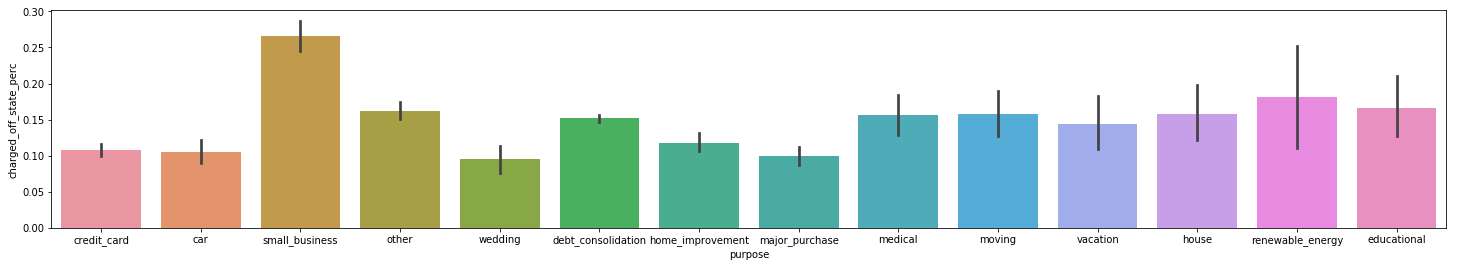

In [51]:
# let see int_rate_range frequency plot
print(loan.purpose.value_counts())
plt.figure(figsize=(25,4))
sns.barplot(x='purpose', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight - there is a clear indication that 'small_business' category has high defaulters. But we may need to find more insights by doing a bivariate analysis with this.

### This completes our categorical univariate analysis and we see that following variables showed strong patterns in influencing the defaulter ratio 
### Interest Rate, Purpose of loan, Annual Income, Loan Term, Employement Length, Grade of loan

### b. Numerical Univariable Analysis

#### We will examine installment, dti, delinq_2yrs, pub_rec, open_acc, revol_bal, loan_income_ratio, pub_rec_bankruptcies

### installment amount

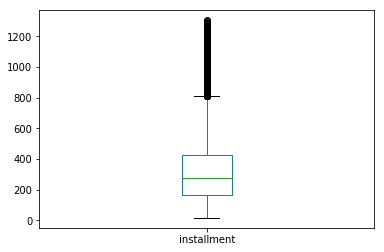

In [52]:
loan.installment.plot(kind='box',subplots =True)
plt.show()

In [53]:
# we cannot do segmented univariate analysis on numerical variable directly, we need to create bins for them
bins = [0, 25, 50, 100, 150, 200, 250, 300, 350, 400, 600, 800, 1200, 1400, 2000]
slot = ['0-25', '25-50', '50-100', '100-150', '150-200','200-250','250-300','300-350','350-400','400-600','600-800','800-1200',
        '1200-1400','1400-2000']
loan['loan_installment_range'] = pd.cut(loan['installment'], bins, labels=slot)

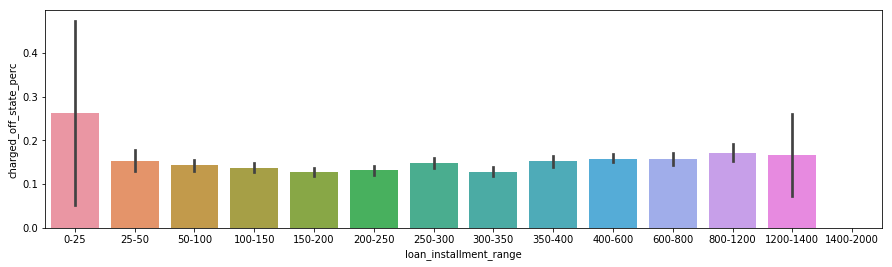

In [54]:
plt.figure(figsize=(15,4))
sns.barplot(x='loan_installment_range', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### Lower installment values are more susceptible to default but its not clear pattern and may have occured due to randomness.

### dti stands for debt to income ratio, higher Dti means poor money management.

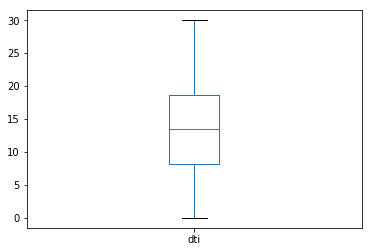

In [55]:
loan.dti.plot(kind='box', subplots = True)
plt.show()

In [56]:
bins = [0, 5, 8, 10, 12, 16, 18, 20, 25, 30, 35]
slot = ['0-5', '5-8', '8-10', '10-12', '12-16','16-18','18-20','20-25','25-30','30-35']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=slot)

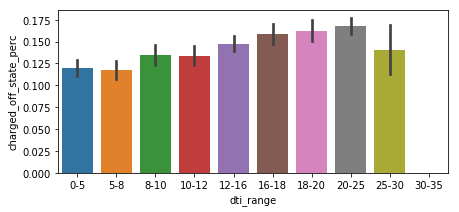

In [57]:
plt.figure(figsize=(7,3))
sns.barplot(x='dti_range', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### Higher dti leads to higher defaultness but pattern is not strong.

### delinq_2yrs - it is the delinquiencis incidence by the borrower in last 2 years

In [58]:
loan.delinq_2yrs.value_counts()

0     33509
1      3105
2       644
3       199
4        55
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

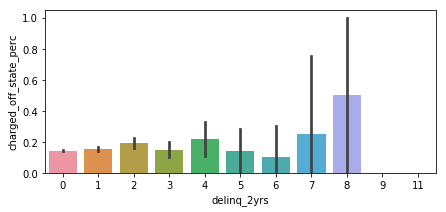

In [59]:
# we do not need to create bin as its categoical by nature due to fewer values
plt.figure(figsize=(7,3))
sns.barplot(x='delinq_2yrs', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### Again no strong signal as for delinquencies > 4 we have very fewer sample to conclude.

### pub_rec - these are public derogatory incidence by borrower, this might be good indicator

In [60]:
loan.pub_rec.value_counts()

0    35515
1     1980
2       47
3        7
4        2
Name: pub_rec, dtype: int64

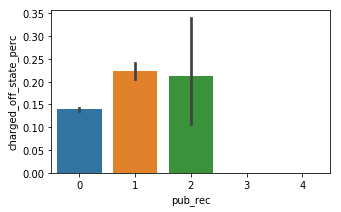

In [61]:
plt.figure(figsize=(5,3))
sns.barplot(x='pub_rec', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### this clearly shows that high pub_rec values lead to high default ratio, there is drop for 2 incidence but sample size is very small. But pattern is very strong.

### open_acc - this represent open credits line for borrowers

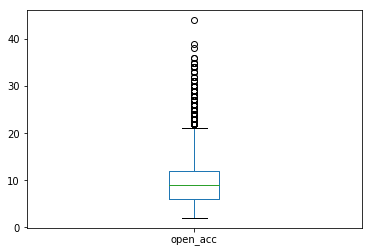

In [62]:
loan.open_acc.plot(kind='box',subplots = True)
plt.show()

In [63]:
# as we can see that for open_acc > 28 doesnt have much sample so we can ignore them
open_acc_loan = loan[loan['open_acc'] <= 28]

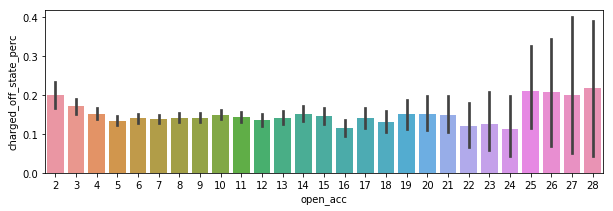

In [64]:
plt.figure(figsize=(10,3))
sns.barplot(x='open_acc', y='charged_off_state', data=open_acc_loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### We see that for credit lines more than 25 see high defaulter ratio but that may be because of sample size. NOT a strong signal to conclude.

### revol_bal - this represent revolving balance by user over time, higher value means bad creditibilty

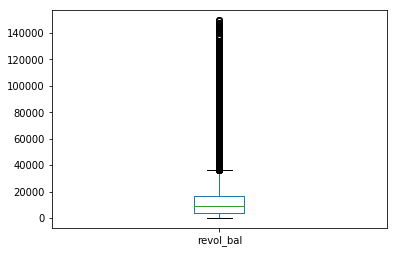

In [65]:
loan.revol_bal.plot(kind='box',subplots = True)
plt.show()

In [66]:
bins = [0, 5, 10, 100, 200, 400,800,1000,1500,2000,4000,6000,8000,10000,14000,18000,20000,50000,100000,200000]
slot = ['0-5', '5-10', '10-100', '100-200', '200-400','400-800','800-1000','1000-1500','1500-2000','2000-4000','4000-6000',
       '6000-8000','8000-10000','10000-14000','14000-18000','18000-20000','20000-50000','50000-100000','100000-200000']
loan['revol_bal_range'] = pd.cut(loan['revol_bal'], bins, labels=slot)

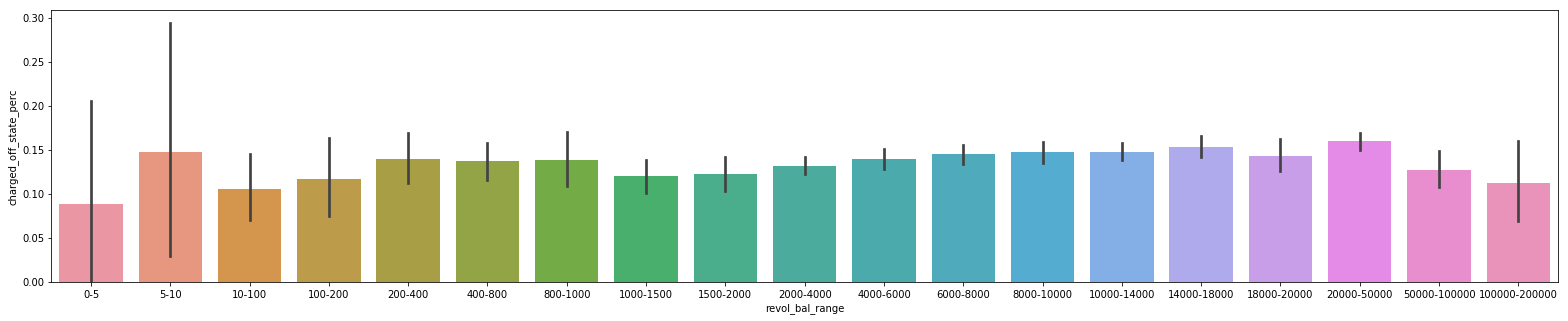

In [67]:
plt.figure(figsize=(27,5))
sns.barplot(x='revol_bal_range', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### No strong signal

### loan_income_ratio

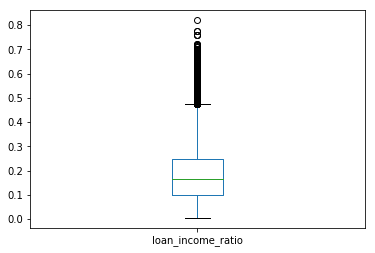

In [68]:
loan.loan_income_ratio.plot(kind='box',subplots =True)
plt.show()

In [69]:
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.5,0.8,1.0]
slot = ['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2','0.2-0.25','0.25-0.3','0.3-0.5','0.5-0.8','0.8-1']
loan['loan_income_ratio_range'] = pd.cut(loan['loan_income_ratio'], bins, labels=slot)

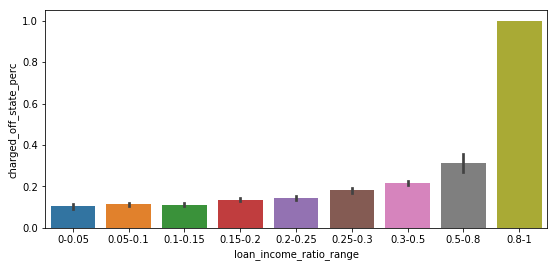

In [70]:
plt.figure(figsize=(9,4))
sns.barplot(x='loan_income_ratio_range', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : This is great indication that higher loan to income ratio is leading to default, Even if we consider ratio till 0.25 we see an increasing pattern.

### pub_rec_bankruptcies  -  this is public bankrupticies record for a borrower.

In [71]:
loan.pub_rec_bankruptcies.value_counts()

0.0    35920
1.0     1626
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

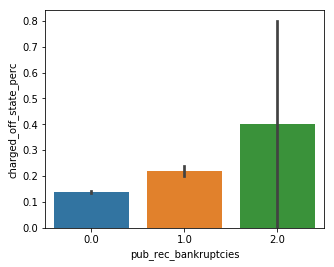

In [72]:
plt.figure(figsize=(5,4))
sns.barplot(x='pub_rec_bankruptcies', y='charged_off_state', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

#### This is a strong signal to conclued that higher pub bankruptices record means that more chance of defaulting.

### To summarize numerical univariate analysis, we see following variables showing strong pattern for being default - pub_rec_bankruptcies, loan_income_ratio, public_rec

In [73]:
summary = {'columns':['issue_month','grade','emp_length','home_ownership','verification_status','term','addr_state',
                      'annual_inc_range','int_rate_range', 'purpose'],
          'Analysis/Pattern':[False,True,True,False,False,True,False,False,True,True],
           'Explaination':['December has higher default ratio but that may be accounted to randomness in data. No particular conclusion can be drawn here.',
                          'We saw a pattern - lower the grade of loan ,higher the default chances.',
                          'Pattern - self-employed people have higher chance of defaulter. But there count is low cannot conclude exactly',
                          'Others have high default ratio but its marginal so cannot be treated as a huge influencer in end result',
                          'Not any particular pattern again',
                          'Pattern-long term loans are more suspectible to default than shorter terms loan',
                          'State NE has very high default rate but it has only 5 records in it, so we need to ignore this abrupt behaviour',
                          'Pattern is not very strong but lower income groups are more suspectible to default. But looking at lower number of records,'+ 
                           'we cannot conclude',
                          'This is great pattern a higher intrest rate results in default.',
                          'Loan against small businesses are tend to default more ']
          }
summary = pd.DataFrame(summary)
print('Summary For Categorical Univariate Analysis')
summary

Summary For Categorical Univariate Analysis


,columns,Analysis/Pattern,Explaination
0,issue_month,False,December has higher default ratio but that may...
1,grade,True,"We saw a pattern - lower the grade of loan ,hi..."
2,emp_length,True,Pattern - self-employed people have higher cha...
3,home_ownership,False,Others have high default ratio but its margina...
4,verification_status,False,Not any particular pattern again
5,term,True,Pattern-long term loans are more suspectible t...
6,addr_state,False,State NE has very high default rate but it has...
7,annual_inc_range,False,Pattern is not very strong but lower income gr...
8,int_rate_range,True,This is great pattern a higher intrest rate re...
9,purpose,True,Loan against small businesses are tend to defa...


In [74]:
summary = {'columns':['installment','dti','delinq_2yrs','pub_rec','open_acc','revol_bal','loan_income_ratio','pub_rec_bankruptcies'],
          'Analysis/Pattern':[False,False,False,True,False,False,True,True],
           'Explaination':['Lower installment values are more suspectible to default but its not clear pattern and may have occured due to randomnesses',
                          'Higher dti leads to higher defaultness but pattern is not strong , that can also be accounted for fewer sample for higher dti',
                          'again no strong signal as for delinquencies > 4 we have very fewer sample to conclude',
                          'this clarly shows that high pub_rec values lead to high default ratio, there is drop for 2 incidence but sample size is very small. But pattern is very strong.',
                          'We see that for credit lines more than 25 see high defaulter ratio but that may be because of sample size. NOt a strong signal to conclude',
                          'No strong signal',
                          'This is great indication that higher loan to income ratio is leading to default, Even if we consider ratio till 0.25 we see an increading pattern.',
                          'This is a strong signal to conclued that higher pub bankruptices record means that more chance of defaulting']
          }
summary = pd.DataFrame(summary)
print('Summary For Numeric Univariate Analysis')
pd.set_option('display.max_columns', 3)
summary

Summary For Numeric Univariate Analysis


,columns,Analysis/Pattern,Explaination
0,installment,False,Lower installment values are more suspectible ...
1,dti,False,Higher dti leads to higher defaultness but pat...
2,delinq_2yrs,False,again no strong signal as for delinquencies > ...
3,pub_rec,True,this clarly shows that high pub_rec values lea...
4,open_acc,False,We see that for credit lines more than 25 see ...
5,revol_bal,False,No strong signal
6,loan_income_ratio,True,This is great indication that higher loan to i...
7,pub_rec_bankruptcies,True,This is a strong signal to conclued that highe...


### 2. Bivariate Analysis

### a. Correlation among variables

#### Since there are quite a few rows which has similar names, let's understand the correlation between them.

In [75]:
loan['funded_amnt'].corr(loan['funded_amnt_inv'])

0.9720373615755886

In [76]:
loan['loan_amnt'].corr(loan['funded_amnt'])

0.9817069732930976

In [77]:
loan['total_pymnt'].corr(loan['total_pymnt_inv'])

0.9793794672253405

In [78]:
loan['total_pymnt'].corr(loan['total_rec_prncp'])

0.9733136478430605

### Insight :  

#### loan_amnt, funded_amnt and funded_amnt_inv are positively correlated

#### total_pymnt and total_pymnt_inv are positively correlated

### so it is a good idea to include just one (eg. loan_amnt, total_pymnt) in our analysis and exclude the other(s) in each of these sets.

### loan_amnt_range and emp_length - Lets see how the result of emp_length analysis behaves by adding loan_amnt_range into analysis

5000-10000         12483
0-5000              9184
10000-15000         7532
15000-20000         4230
20000-25000         2737
25000 and above     1385
Name: loan_amnt_range, dtype: int64


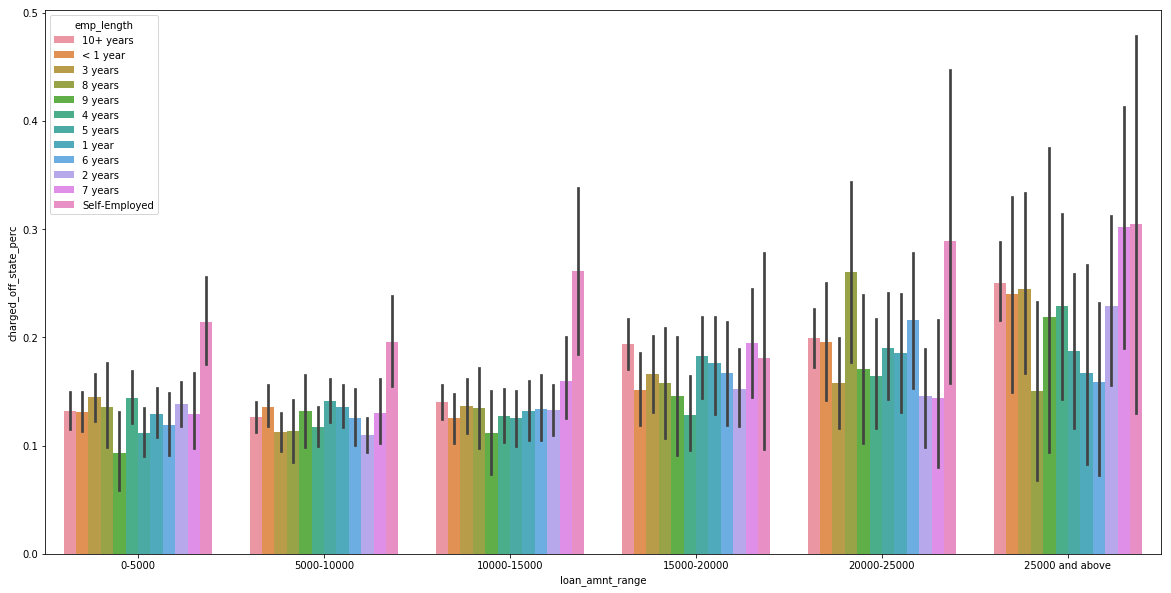

In [79]:
print(loan.loan_amnt_range.value_counts())
plt.figure(figsize=(20,10))
sns.barplot(x='loan_amnt_range', y='charged_off_state', hue='emp_length', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : It can be seen that self-employed category has higher defaulters. It is very evident from the 2 loan amount categories 5000-10000 and 0-5000 which has the highest no. of customers

25000-50000       12553
50000-75000       11458
75000-100000       5935
100000 - above     5168
0-25000            2437
Name: annual_inc_range, dtype: int64


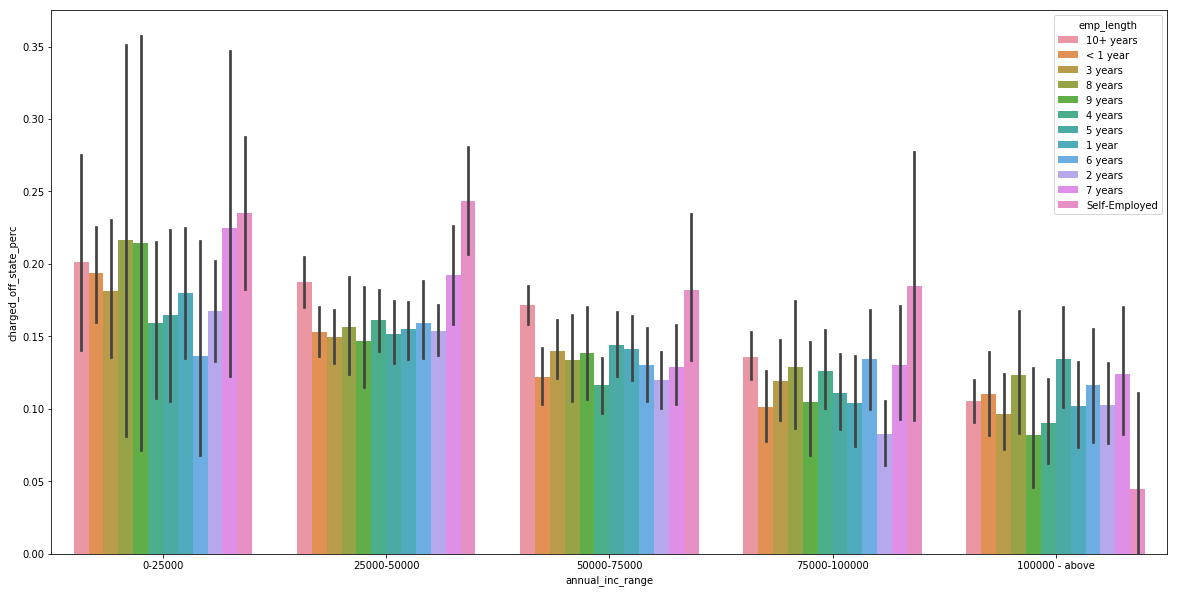

In [80]:
print(loan.annual_inc_range.value_counts())
plt.figure(figsize=(20,10))
sns.barplot(x='annual_inc_range', y='charged_off_state', hue='emp_length', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : Witht the above graph we can see that self-employed, followed by 10+years are the defaulters. For income range 0-25000 and 25000-50000 self employed are clearly high defaulters, but as the income increases to more than 100000, these customers are not defaulting much.   

### So to conclude there is a high chance that self employed customers with either lower income or lower loan amount will default

5000-10000         12483
0-5000              9184
10000-15000         7532
15000-20000         4230
20000-25000         2737
25000 and above     1385
Name: loan_amnt_range, dtype: int64


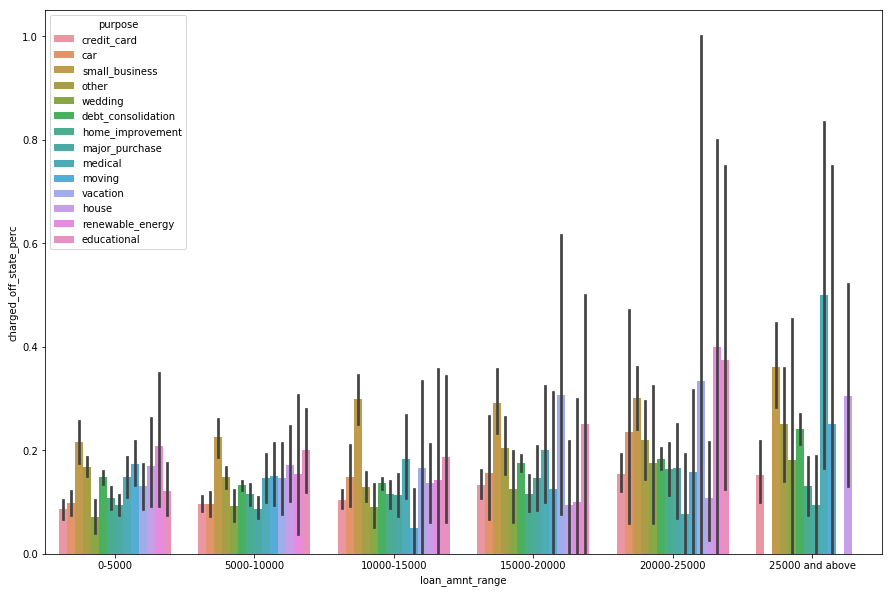

In [81]:
print(loan.loan_amnt_range.value_counts())
plt.figure(figsize=(15,10))
sns.barplot(x='loan_amnt_range', y='charged_off_state', hue='purpose', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : It can be seen that customers who have taken loan for small business are the major defaulters. They are followed by 'vacation' category in the loan range of 15k-20k and 'educational' and 'renewable_energy' in the loan range of 20k-25k 

25000-50000       12553
50000-75000       11458
75000-100000       5935
100000 - above     5168
0-25000            2437
Name: annual_inc_range, dtype: int64


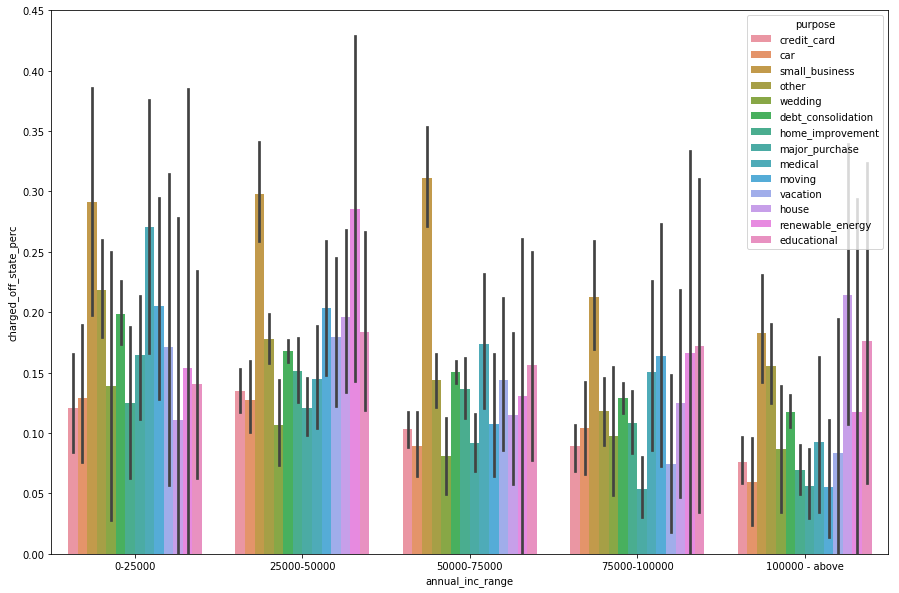

In [82]:
print(loan.annual_inc_range.value_counts())
plt.figure(figsize=(15,10))
sns.barplot(x='annual_inc_range', y='charged_off_state', hue='purpose', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### Insight : Again small business customers have high default ratio in most of the income range. They are followed by renewable_energy and then by medical category.

0.1-0.15    7260
0.05-0.1    7110
0.15-0.2    6447
0.3-0.5     5508
0.2-0.25    4784
0.25-0.3    3256
0-0.05      2700
0.5-0.8      485
0.8-1          1
Name: loan_income_ratio_range, dtype: int64


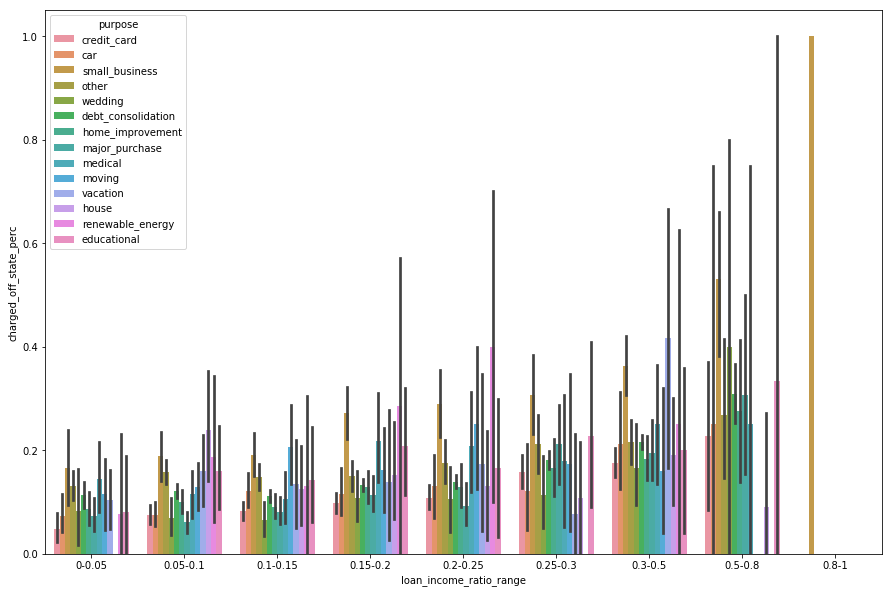

In [83]:
print(loan.loan_income_ratio_range.value_counts())
plt.figure(figsize=(15,10))
sns.barplot(x='loan_income_ratio_range', y='charged_off_state', hue='purpose', data=loan)
plt.ylabel("charged_off_state_perc")
plt.show()

### So it can be expected that small business customers default under the low income range and low loan amount range.

B    11399
A     9864
C     7565
D     4917
E     2578
F      944
G      284
Name: grade, dtype: int64


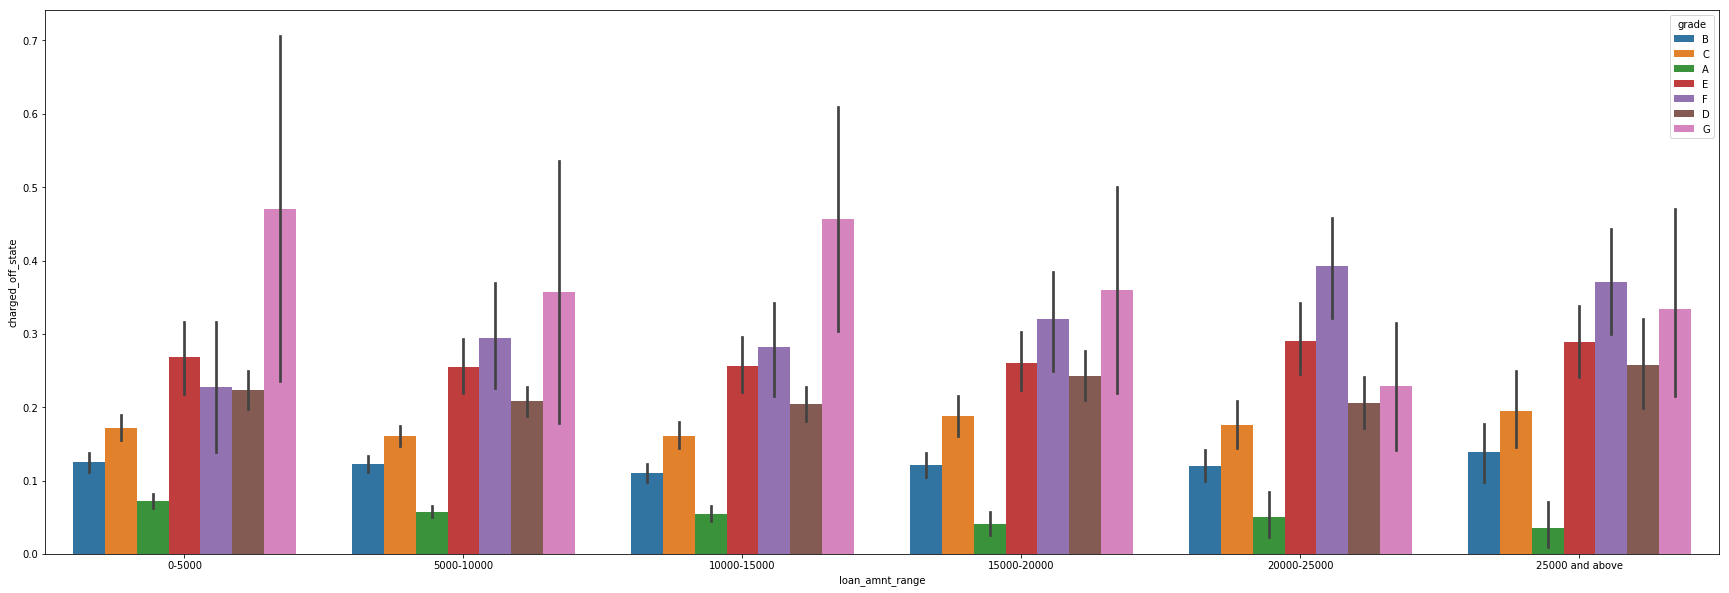

In [84]:
print(loan.grade.value_counts())
plt.figure(figsize=(30,10))
sns.barplot(x='loan_amnt_range', y='charged_off_state', hue='grade', data=loan)
plt.show()

### Insight : So when the laon amount is less, there are high percentage of defaulters on grade 'G' loans

term                      36 months   60 months
loan_income_ratio_range                        
0.2-0.25                      226.0        53.0
0.05-0.1                      626.0       184.0
0.15-0.2                      543.0       275.0
0.1-0.15                      514.0       362.0
0.3-0.5                       380.0       304.0
0.25-0.3                      264.0       328.0
0-0.05                        451.0       740.0
0.5-0.8                        28.0       123.0
0.8-1                           NaN         1.0


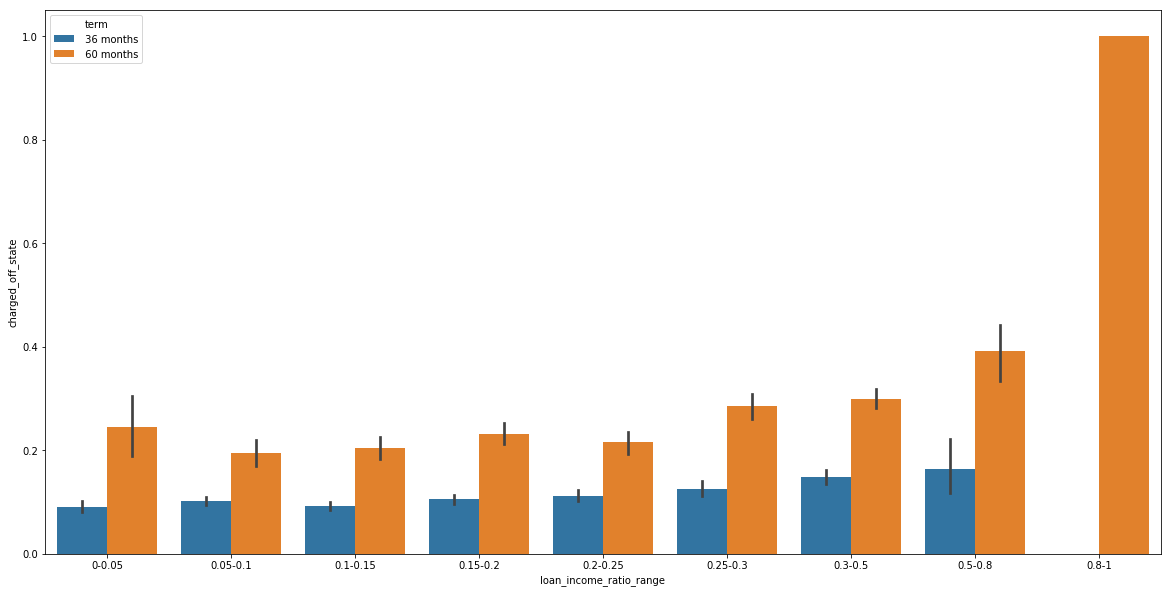

In [85]:
print(loan.pivot_table(index='loan_income_ratio_range', columns='term', values='charged_off_state', aggfunc=sum))
plt.figure(figsize=(20,10))
sns.barplot(x='loan_income_ratio_range', y='charged_off_state', hue='term', data=loan)
plt.show()

### Insight : So irrespective of the loan-income ratio, higher the terrm, higher the chances of defaulting. Though the percentage is more if the ratio increases.